<a href="https://colab.research.google.com/github/chandini2595/FireSense/blob/main/Colab_Files/Classification_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification on DS1

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file1_path = "/content/cleaned_ds1.csv"
df1 = pd.read_csv(file1_path)

# Convert 'date' to datetime format
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# Drop potential leakage columns
df1_cleaned = df1.drop(columns=['FIRE_NAME', 'GIS_ACRES'], errors='ignore')

# Create binary target variable: Fire (1) if CAUSE > 0, No Fire (0) otherwise
df1_cleaned['fire'] = (df1_cleaned['CAUSE'] > 0).astype(int)

# Drop 'CAUSE' column since we derived 'fire' from it
df1_cleaned.drop(columns=['CAUSE'], inplace=True)

# Encode 'county' as categorical numeric
df1_cleaned['county'] = df1_cleaned['county'].astype('category').cat.codes


In [8]:
# Select relevant features
selected_features = [
    'maxtempF', 'mintempF', 'avgtempF', 'humid', 'wind', 'precip', 'sunHour', 'county'
]

# Define features (X) and target variable (y)
X = df1_cleaned[selected_features]
y = df1_cleaned['fire']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [10]:
# Convert scaled arrays back to DataFrame format
X_train_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=selected_features)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_df, y_train)


RandomForestClassifier(random_state=42)

Model Accuracy: 0.9195

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1420
           1       0.91      0.86      0.88       778

    accuracy                           0.92      2198
   macro avg       0.92      0.91      0.91      2198
weighted avg       0.92      0.92      0.92      2198



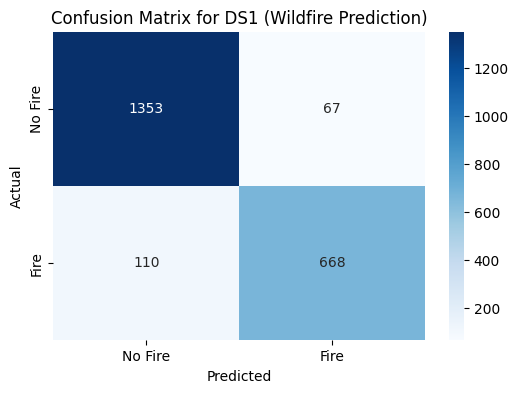

In [11]:
# Predict on test data
y_pred = rf_model.predict(X_test_df)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for DS1 (Wildfire Prediction)")
plt.show()

# Got 91% accuracy